In [2]:
import mask
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from field_importer import get_field
import xarray as xr
import matplotlib.animation as animation
from IPython import display
from scipy.ndimage import gaussian_filter1d as gf

%config Completer.use_jedi = False

In [93]:
data = Dataset('/home/robbie/Dropbox/beaufort_sea/pressure.nc')
# data = Dataset('/home/robbie/Dropbox/beaufort_sea/jan2021.nc')
lons = np.array(data['longitude'])
lats = np.array(data['latitude'])

data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2021-02-18 15:17:03 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data3/adaptor.mars.internal-1613661382.6577191-4812-11-958b4a4e-b2f9-4ab8-b9d9-b3ca4a0dd7f0.nc /cache/tmp/958b4a4e-b2f9-4ab8-b9d9-b3ca4a0dd7f0-adaptor.mars.internal-1613661382.6583493-4812-5-tmp.grib
    dimensions(sizes): longitude(1440), latitude(121), expver(2), time(410)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 expver(expver), int32 time(time), int16 z(time,expver,latitude,longitude)
    groups: 

In [95]:
e0 = datetime.date(1900,1,1)
t = np.array(data['time'])
dates = [e0 + datetime.timedelta(hours=int(h)) for h in t]


gph_means = []
for i, date in enumerate(dates):
    
    gph = np.nanmean(data['z'][i][0])
    
    print(date, gph)
#     gph_means.append(gph)

2020-01-01 160.60256799787356
2020-01-02 404.3832508221945
2020-01-03 467.6273789114143
2020-01-04 315.2855138615395
2020-01-05 319.4920957743095
2020-01-06 313.3495151691681
2020-01-07 254.69837659711447
2020-01-08 329.31960203117836
2020-01-09 708.5533220371955
2020-01-10 704.8791154432114
2020-01-11 503.99112138162275
2020-01-12 371.727541001235
2020-01-13 328.87085017996736
2020-01-14 341.68715941786684
2020-01-15 388.4117007639608
2020-01-16 405.5295310262835
2020-01-17 92.20276712214672
2020-01-18 236.16998715765567
2020-01-19 371.12924581688173
2020-01-20 391.7496334767828
2020-01-21 587.7904532499523
2020-01-22 618.0035728972691
2020-01-23 769.3957894796433
2020-01-24 876.9300854508197
2020-01-25 765.6724883144399
2020-01-26 851.3864665433102
2020-01-27 894.1558403257235
2020-01-28 850.042676294973
2020-01-29 661.2978705181674
2020-01-30 496.76431140011107
2020-01-31 387.9309447853606
2020-02-01 307.53960358200817
2020-02-02 465.5005983429055
2020-02-03 571.100190175065
2020-02

2020-10-15 1451.2146243256846
2020-10-16 1679.78363554035
2020-10-17 1640.301596735931
2020-10-18 1650.4767744024393
2020-10-19 1426.5189271422414
2020-10-20 1321.7168357407036
2020-10-21 1273.0840847327117
2020-10-22 1096.2545888074017
2020-10-23 861.70167140603
2020-10-24 840.1664458963085
2020-10-25 849.7207390073205
2020-10-26 604.739084024137
2020-10-27 571.00376544646
2020-10-28 646.3428324132178
2020-10-29 623.5589468304102
2020-10-30 658.3324630796832
2020-10-31 746.0703341298288
2020-11-01 709.2549923759185
2020-11-02 640.1240369289744
2020-11-03 644.0404819452983
2020-11-04 30.260239319538627
2020-11-05 57.59849715209712
2020-11-06 320.8485430111642
2020-11-07 557.480581336435
2020-11-08 729.1524587459502
2020-11-09 654.2829793106692
2020-11-10 573.8950714031855
2020-11-11 354.63980228069823
2020-11-12 26.92359726081383
2020-11-13 -237.50078590674124
2020-11-14 56.64170037153405
2020-11-15 132.779244532815
2020-11-16 -77.88746535647607
2020-11-17 65.42247738229156
2020-11-18 

ValueError: output array is read-only

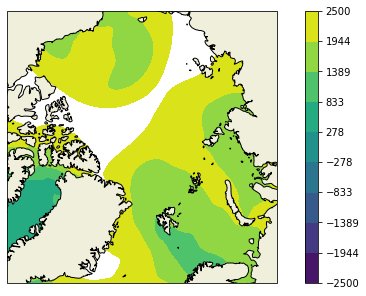

In [89]:
def cplot(lon,
          lat,
          pressure,
          bounding_lat=65,
          land=True,
          gridlines=True,
          figsize=[10,5],
          color_scale=(None,None),
          color_scheme='plasma',
          scale=100):
    
    """
    Plots a north polar plot using cartopy. \
    Must be supplied with gridded arrays of lon, lat and data
    """

    
    # Make figure template

    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.NorthPolarStereo())

    
    if land == True: # Superimposes a land mask
        ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

    # Set the extent of the plot, using the latitudinal limit given in the function arguments    
    
    ax.set_extent([-180, 180, 90, 70], ccrs.PlateCarree())
    
#     if gridlines == True:
#         ax.gridlines()
        
#     vmin, vmax = color_scale[0], color_scale[1]
    
    c = ax.contourf(lon, lat, pressure,
              transform=ccrs.PlateCarree(),
              levels=np.linspace(-2500,2500,10)
             )
    plt.colorbar(c)
    
    plt.show()

cplot(lons, lats, data['z'][-2][1])

In [83]:
data['z'].shape

(410, 2, 121, 1440)

In [84]:
start_day = datetime.date(year=2020, month=1, day=1)
start_day_of_year = start_day.timetuple().tm_yday

In [90]:
hemisphere = 'n'

fig = plt.figure(figsize=(10,10))

if hemisphere == 'n':
    ax = plt.axes(projection=ccrs.NorthPolarStereo())
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())    
else:  
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)

ax.margins()

s = 4
scale = 200
size_lim = 20


qv  =   ax.pcolormesh(lons,
                   lats,
                   data['z'][7][0],
                  transform=ccrs.PlateCarree(),
                     )

# c  =   ax.contour(lons,
#                    lats,
#                    data['z'][7][0],
#                   transform=ccrs.PlateCarree(),
#                   levels=np.linspace(-2500,2500,10),alpha=0,
#                      )

    
ann = ax.annotate('',
                  xy=(0.05,0.9),
                  xycoords='axes fraction',
                  fontsize=25,
                  ha='left')

ann.set_animated(True)

list_of_cs = []
    
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

########################################################

def animate(frame):
    
    if frame % 10 == 0: #Track progress
        print(frame)

    day = frame
    
    date = start_day + datetime.timedelta(days=day*7)
    
    ann.set_text(f'{dates[frame]}')
    

    qv.set_array(data['z'][day][0])
    
    for i in list_of_cs:
        i.set_alpha(0)
    
    if date > datetime.date(2020,12,1):
        c = plt.contour(lons,
                       lats,
                       data['z'][day][1],
                      transform=ccrs.PlateCarree(),
                      levels=np.linspace(-2500,2500,10),
                        colors='k',
                         )
        qv.set_array(data['z'][day][1])
        
    else:
        c = plt.contour(lons,
                       lats,
                       data['z'][day][0],
                      transform=ccrs.PlateCarree(),
                      levels=np.linspace(-2500,2500,10),
                        colors='k',
                         )
        qv.set_array(data['z'][day][0])
    

    list_of_cs.append(c)
    
    
    return(c)
    
#######################################################

ani = animation.FuncAnimation(fig,
                              animate,
                             frames= range(300,410),
                             )    

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

300
300


/home/robbie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/robbie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/robbie/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


310
320
330
340
350
360
370
380
390
400


In [21]:
Writer = animation.writers['ffmpeg']

writer = Writer(fps=5, metadata=dict(artist='Robbie Mallett CPOM UCL'))

ani.save('/home/robbie/Dropbox/beaufort_sea/IMV_quiver.mp4', writer=writer)

0
0
10
20
30
40
50


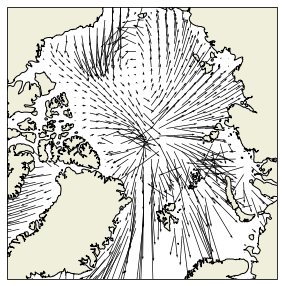

In [160]:

year = 2011 

d = Dataset(f'/home/robbie/Dropbox/Data/IMV/icemotion_daily_nh_25km_{year}0101_{year}1231_v4.1.nc')

sow_u = np.nanmean(d['u'][95:100],axis=0)
sow_v = np.nanmean(d['v'][95:100],axis=0)


IMV_field_u = mask_large_vals(sow_u,threshold=1000)
IMV_field_v = mask_large_vals(sow_v,threshold=1000)

# IMV_field_u = sam_mask(IMV_field_u,min_lat=80,max_lat=82)
# IMV_field_v = sam_mask(IMV_field_v,min_lat=80,max_lat=82)

IMV_field_N = -IMV_field_u * np.sin(np.radians(lon_grid)) + IMV_field_v * np.cos(np.radians(lon_grid))

# IMV_field_u.shape

skipper = 5

qplot(lon_grid[::skipper,::skipper],lat_grid[::skipper,::skipper],
      IMV_field_u[::skipper,::skipper],IMV_field_v[::skipper,::skipper],scale=50)



(array([  5.,   9.,  13.,  33.,  59.,  52.,  47., 122.,  59.]),
 array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ]),
 <BarContainer object of 9 artists>)

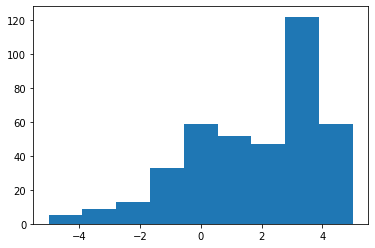

In [136]:
IMV_field_N_valid = [v for v in IMV_field_N.ravel() if ~np.isnan(v)]
plt.hist(IMV_field_N_valid, bins=np.linspace(-5,5,10))


(array([0., 0., 0., 0., 4., 1., 1., 0., 0.]),
 array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
         0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ]),
 <BarContainer object of 9 artists>)

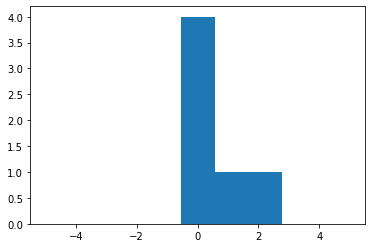

In [133]:
IMV_field_N_valid = [v for v in IMV_field_u.ravel() if ~np.isnan(v)]
plt.hist(IMV_field_N_valid, bins=np.linspace(-5,5,10))
